In [26]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn

In [27]:
df = pd.read_csv('CPU_benchmark_v4.csv')

In [28]:
cpu_name = df.iloc[:,0]

In [29]:
features = df.iloc[:,1:8]

In [30]:
features

,price,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf
0,NaN,108822,NaN,3330,NaN,280.0,388.65
1,7299.99,88338,12.10,2635,0.36,280.0,315.49
2,NaN,86006,NaN,2387,NaN,NaN,NaN
3,7060.00,85861,12.16,2727,0.39,225.0,381.60
4,6807.98,83971,12.33,2626,0.39,280.0,299.90
...,...,...,...,...,...,...,...
3820,NaN,84,NaN,225,NaN,38.0,2.22
3821,NaN,83,NaN,180,NaN,54.7,1.52
3822,NaN,81,NaN,223,NaN,57.8,1.41
3823,NaN,80,NaN,83,NaN,5.0,16.08


In [31]:
imputer = IterativeImputer(max_iter=10, random_state=0)

In [33]:
imputed_features = pd.DataFrame(imputer.fit_transform(features))

In [34]:
imputed_features

,0,1,2,3,4,5,6
0,6836.793697,108822.0,6.725256,3330.0,-24.468687,280.000000,388.650000
1,7299.990000,88338.0,12.100000,2635.0,0.360000,280.000000,315.490000
2,5840.433329,86006.0,23.141879,2387.0,-18.709693,341.349201,315.698346
3,7060.000000,85861.0,12.160000,2727.0,0.390000,225.000000,381.600000
4,6807.980000,83971.0,12.330000,2626.0,0.390000,280.000000,299.900000
...,...,...,...,...,...,...,...
3820,291.564073,84.0,15.478419,225.0,19.128106,38.000000,2.220000
3821,349.254684,83.0,17.513442,180.0,18.657740,54.700000,1.520000
3822,343.061877,81.0,18.597743,223.0,18.685189,57.800000,1.410000
3823,255.010132,80.0,8.397380,83.0,19.079960,5.000000,16.080000


In [117]:
scaler = StandardScaler()

In [118]:
scaled_imputed_features = pd.DataFrame(scaler.fit_transform(imputed_features))

In [119]:
scaled_imputed_features.columns = features.columns

In [120]:
data = pd.concat([cpu_name, scaled_imputed_features], axis=1, join='inner')

In [121]:
data = pd.concat([data, df.iloc[:,8:12]], axis=1, join='inner')

In [122]:
data

,cpuName,price,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf,cores,testDate,socket,category
0,AMD Ryzen Threadripper PRO 5995WX,8.965768,10.693277,-0.898098,2.377373,-2.956197,4.961053,1.947529,64,2022,sWRX8,Desktop
1,AMD EPYC 7763,9.607200,8.563142,-0.698362,1.525199,-1.123116,4.961053,1.438073,64,2021,SP3,Server
2,AMD EPYC 7J13,7.586012,8.320637,-0.288025,1.221114,-2.531015,6.349228,1.439524,64,2021,unknown,Server
3,AMD EPYC 7713,9.274863,8.305559,-0.696133,1.638005,-1.120902,3.716544,1.898436,64,2021,SP3,Server
4,AMD Ryzen Threadripper PRO 3995WX,8.925867,8.109017,-0.689815,1.514164,-1.120902,4.961053,1.329511,64,2020,sWRX8,Desktop
...,...,...,...,...,...,...,...,...,...,...,...,...
3820,Intel Pentium 4 1.60GHz,-0.098040,-0.614406,-0.572814,-1.429823,0.262516,-0.514786,-0.743410,1,2009,PGA478,Desktop
3821,Intel Pentium 4 1400MHz,-0.018150,-0.614510,-0.497188,-1.484999,0.227790,-0.136908,-0.748285,1,2009,PGA423,Desktop
3822,Intel Pentium 4 1500MHz,-0.026726,-0.614718,-0.456894,-1.432275,0.229816,-0.066763,-0.749051,1,2009,PGA423,Desktop
3823,VIA Eden 1000MHz,-0.148660,-0.614822,-0.835959,-1.603936,0.258962,-1.261492,-0.646895,1,2017,NanoBGA2,Laptop


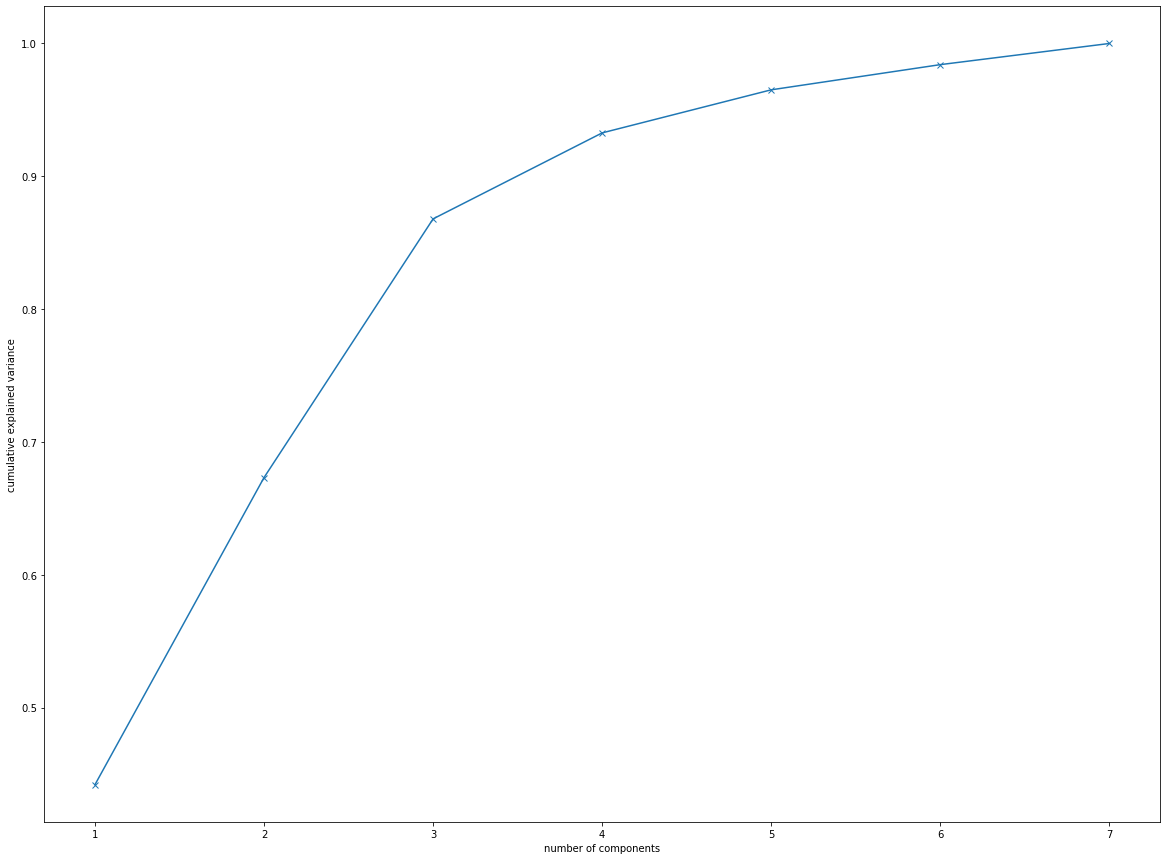

In [123]:
plt.figure(figsize=(20, 15))
pca = PCA().fit(scaled_imputed_features)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='x')
labels = [1, 2, 3, 4, 5, 6, 7]
ticks = [0, 1, 2, 3, 4, 5, 6]
plt.xticks(ticks=ticks, labels=labels)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [53]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var) + 1)]

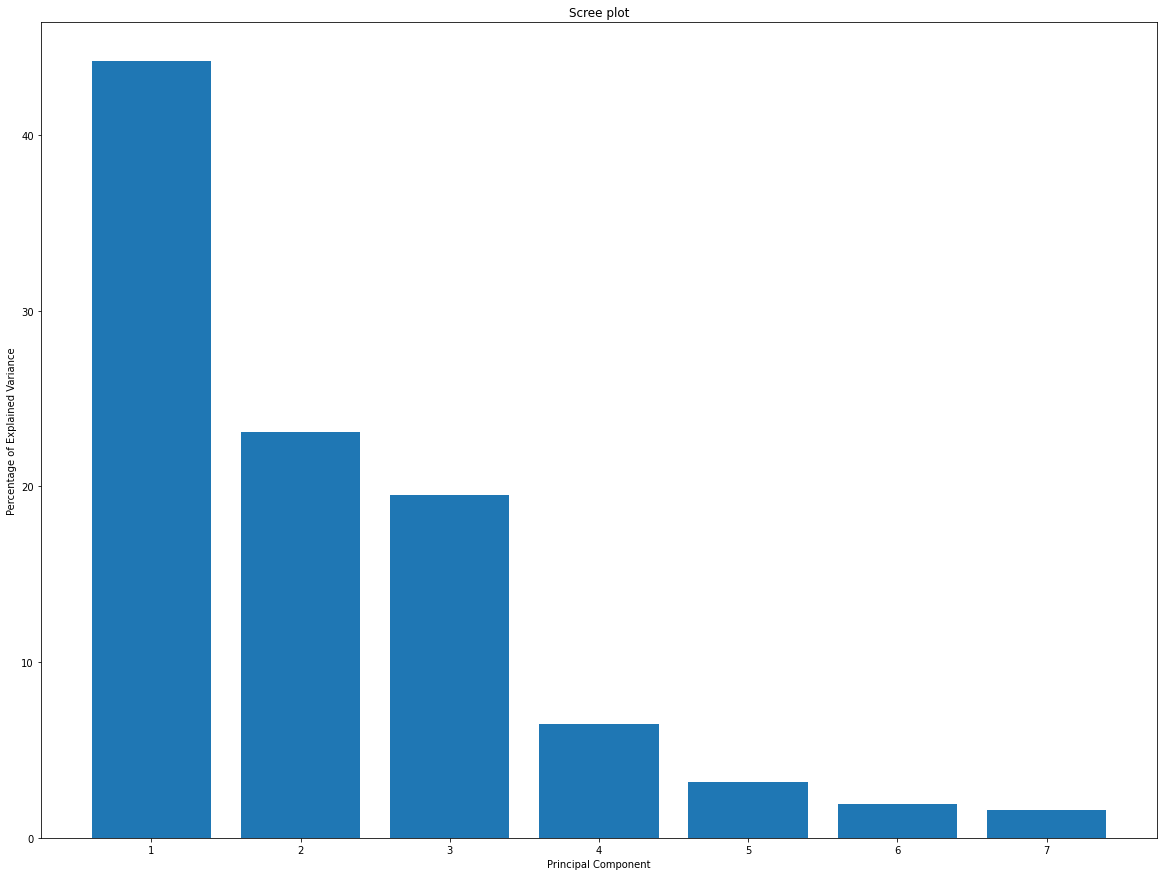

In [54]:
plt.figure(figsize=(20, 15))
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Explained Variance')
plt.title('Scree plot')
plt.show()

In [84]:
pca = PCA(n_components=3)
pca.fit(scaled_imputed_features)
pca_data = pca.transform(scaled_imputed_features)

In [85]:
pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2', 'PC3'])

In [86]:
pca_df

,PC1,PC2,PC3
0,13.902751,-1.957161,-4.631772
1,11.960909,-1.259298,-5.626004
2,11.805105,-1.277229,-5.365182
3,11.416805,-1.338302,-4.472941
4,11.388206,-1.162546,-5.391587
...,...,...,...
3820,-1.543625,-0.753658,-0.638266
3821,-1.378831,-0.693696,-0.882875
3822,-1.331987,-0.638154,-0.899289
3823,-1.902467,-1.085376,-0.223191


In [87]:
data = pd.concat([cpu_name, pca_df], axis=1, join='inner')
data = pd.concat([data, df.iloc[:,8:12]], axis=1, join='inner')

In [88]:
data

,cpuName,PC1,PC2,PC3,cores,testDate,socket,category
0,AMD Ryzen Threadripper PRO 5995WX,13.902751,-1.957161,-4.631772,64,2022,sWRX8,Desktop
1,AMD EPYC 7763,11.960909,-1.259298,-5.626004,64,2021,SP3,Server
2,AMD EPYC 7J13,11.805105,-1.277229,-5.365182,64,2021,unknown,Server
3,AMD EPYC 7713,11.416805,-1.338302,-4.472941,64,2021,SP3,Server
4,AMD Ryzen Threadripper PRO 3995WX,11.388206,-1.162546,-5.391587,64,2020,sWRX8,Desktop
...,...,...,...,...,...,...,...,...
3820,Intel Pentium 4 1.60GHz,-1.543625,-0.753658,-0.638266,1,2009,PGA478,Desktop
3821,Intel Pentium 4 1400MHz,-1.378831,-0.693696,-0.882875,1,2009,PGA423,Desktop
3822,Intel Pentium 4 1500MHz,-1.331987,-0.638154,-0.899289,1,2009,PGA423,Desktop
3823,VIA Eden 1000MHz,-1.902467,-1.085376,-0.223191,1,2017,NanoBGA2,Laptop


In [89]:
pca.explained_variance_ratio_.sum()

0.8679456099867175

Text(0.5, 0, 'PC3')

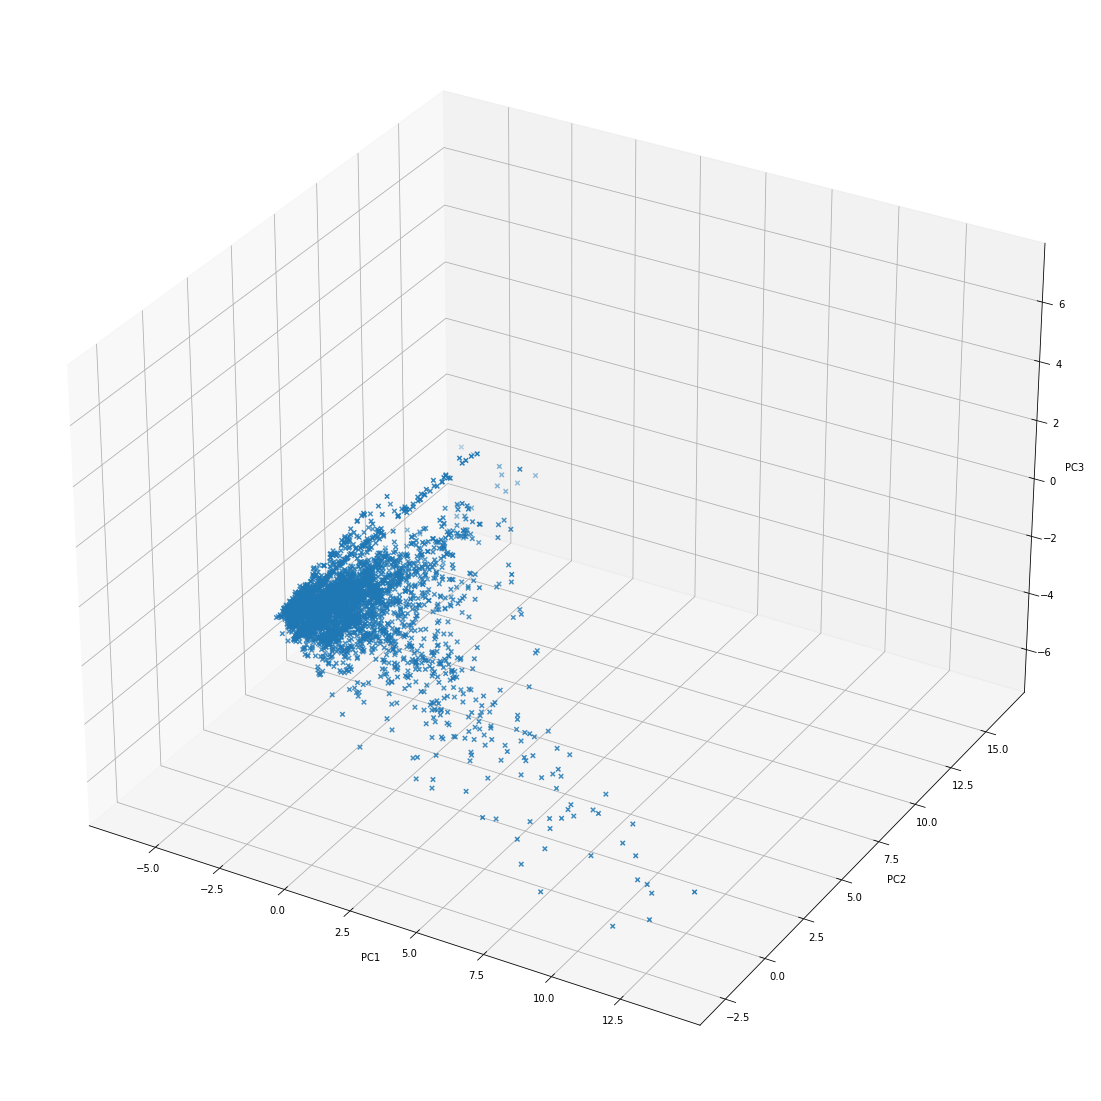

In [92]:
from mpl_toolkits import mplot3d

plt.figure(plt.figure(figsize=(20, 20)))
ax = plt.axes(projection='3d')
ax.scatter3D(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], marker='x')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
# ax.view_init(30, 30)

In [93]:
pca = PCA(n_components=2)
pca.fit(scaled_imputed_features)
pca_data = pca.transform(scaled_imputed_features)

pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

data = pd.concat([cpu_name, pca_df], axis=1, join='inner')
data = pd.concat([data, df.iloc[:,8:12]], axis=1, join='inner')

In [94]:
data

,cpuName,PC1,PC2,cores,testDate,socket,category
0,AMD Ryzen Threadripper PRO 5995WX,13.902751,-1.957161,64,2022,sWRX8,Desktop
1,AMD EPYC 7763,11.960909,-1.259298,64,2021,SP3,Server
2,AMD EPYC 7J13,11.805105,-1.277229,64,2021,unknown,Server
3,AMD EPYC 7713,11.416805,-1.338302,64,2021,SP3,Server
4,AMD Ryzen Threadripper PRO 3995WX,11.388206,-1.162546,64,2020,sWRX8,Desktop
...,...,...,...,...,...,...,...
3820,Intel Pentium 4 1.60GHz,-1.543625,-0.753658,1,2009,PGA478,Desktop
3821,Intel Pentium 4 1400MHz,-1.378831,-0.693696,1,2009,PGA423,Desktop
3822,Intel Pentium 4 1500MHz,-1.331987,-0.638154,1,2009,PGA423,Desktop
3823,VIA Eden 1000MHz,-1.902467,-1.085376,1,2017,NanoBGA2,Laptop


In [95]:
pca.explained_variance_ratio_.sum()

0.6731669111779537

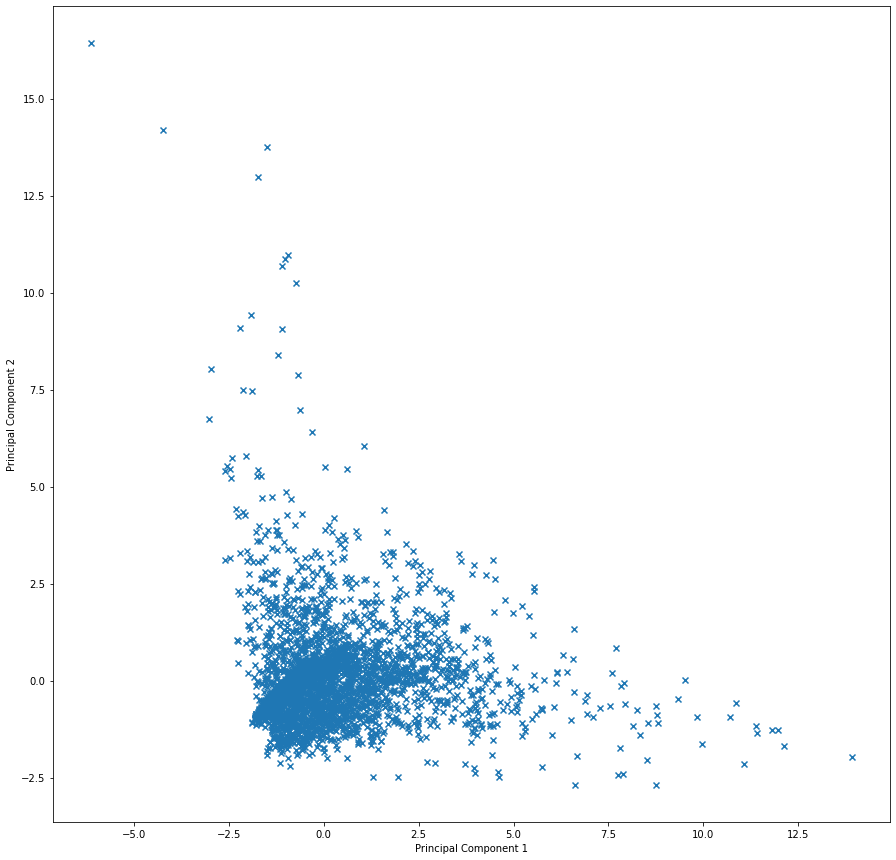

In [96]:
plt.figure(plt.figure(figsize=(15, 15)))
plt.scatter(pca_df['PC1'], pca_df['PC2'], marker='x')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# FROM HERE

In [147]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn

In [150]:
df = pd.read_csv('CPU_benchmark_v4.csv')
cpu_name = df.iloc[:,0]
features = df.iloc[:,1:9]

In [192]:
imputer = IterativeImputer(max_iter=10, random_state=0)
imputed_features = pd.DataFrame(imputer.fit_transform(features))
imputed_features.columns = features.columns

In [193]:
features

,price,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf,cores
0,NaN,108822,NaN,3330,NaN,280.0,388.65,64
1,7299.99,88338,12.10,2635,0.36,280.0,315.49,64
2,NaN,86006,NaN,2387,NaN,NaN,NaN,64
3,7060.00,85861,12.16,2727,0.39,225.0,381.60,64
4,6807.98,83971,12.33,2626,0.39,280.0,299.90,64
...,...,...,...,...,...,...,...,...
3820,NaN,84,NaN,225,NaN,38.0,2.22,1
3821,NaN,83,NaN,180,NaN,54.7,1.52,1
3822,NaN,81,NaN,223,NaN,57.8,1.41,1
3823,NaN,80,NaN,83,NaN,5.0,16.08,1


In [194]:
imputed_features

,price,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf,cores
0,6698.132685,108822.0,7.850724,3330.0,-23.981249,280.000000,388.650000,64.0
1,7299.990000,88338.0,12.100000,2635.0,0.360000,280.000000,315.490000,64.0
2,6627.714170,86006.0,23.848576,2387.0,-20.039988,368.686477,286.437329,64.0
3,7060.000000,85861.0,12.160000,2727.0,0.390000,225.000000,381.600000,64.0
4,6807.980000,83971.0,12.330000,2626.0,0.390000,280.000000,299.900000,64.0
...,...,...,...,...,...,...,...,...
3820,11.719605,84.0,16.913497,225.0,19.849360,38.000000,2.220000,1.0
3821,38.661445,83.0,19.088758,180.0,19.451605,54.700000,1.520000,1.0
3822,40.137998,81.0,20.130477,223.0,19.458171,57.800000,1.410000,1.0
3823,-26.196684,80.0,9.872851,83.0,19.816758,5.000000,16.080000,1.0


In [195]:
scaler = MinMaxScaler()
scaled_imputed_features = pd.DataFrame(scaler.fit_transform(imputed_features))
scaled_imputed_features.columns = features.columns


In [196]:
scaled_imputed_features

,price,cpuMark,cpuValue,threadMark,threadValue,TDP,powerPerf,cores
0,0.750418,1.000000,0.022111,0.767327,0.018325,0.758141,0.331067,0.797468
1,0.816304,0.811633,0.034424,0.603489,0.100214,0.758141,0.280577,0.797468
2,0.742709,0.790188,0.068467,0.545026,0.031584,1.000000,0.260526,0.797468
3,0.790032,0.788855,0.034598,0.625177,0.100314,0.608149,0.326201,0.797468
4,0.762443,0.771475,0.035090,0.601367,0.100314,0.758141,0.269817,0.797468
...,...,...,...,...,...,...,...,...
3820,0.018440,0.000064,0.048372,0.035361,0.165779,0.098177,0.064378,0.000000
3821,0.021390,0.000055,0.054675,0.024752,0.164441,0.143720,0.063895,0.000000
3822,0.021551,0.000037,0.057693,0.034889,0.164463,0.152174,0.063819,0.000000
3823,0.014290,0.000028,0.027970,0.001886,0.165670,0.008181,0.073943,0.000000


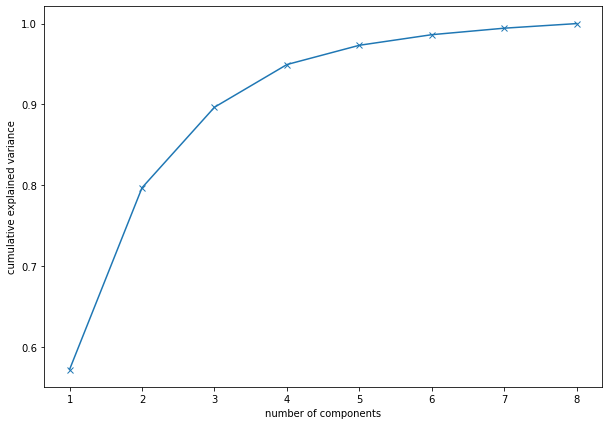

In [198]:
plt.figure(figsize=(10, 7))
pca = PCA().fit(scaled_imputed_features)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='x')
labels = [1, 2, 3, 4, 5, 6, 7, 8]
ticks = [0, 1, 2, 3, 4, 5, 6, 7]
plt.xticks(ticks=ticks, labels=labels)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

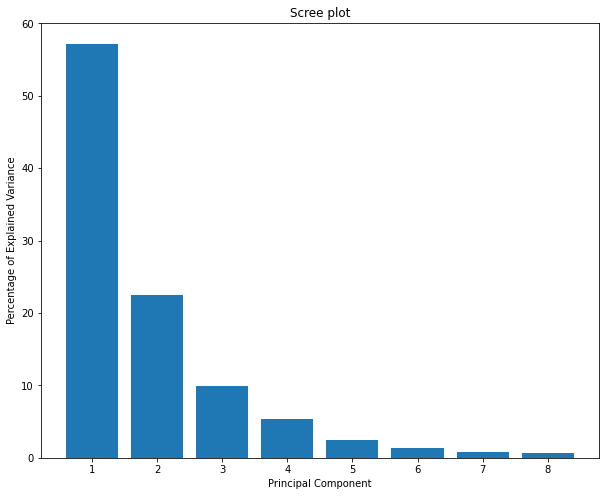

In [199]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = [str(x) for x in range(1, len(per_var) + 1)]

plt.figure(figsize=(10, 8))
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Explained Variance')
plt.title('Scree plot')
plt.show()

In [162]:
pca = PCA(n_components=2)
pca.fit(scaled_imputed_features)
pca_data = pca.transform(scaled_imputed_features)

pca_df = pd.DataFrame(data=pca_data, columns=['PC1', 'PC2'])

data = pd.concat([cpu_name, pca_df], axis=1, join='inner')
data = pd.concat([data, df.iloc[:,9:12]], axis=1, join='inner')

In [163]:
pca.explained_variance_ratio_.sum()

0.7971487753348901

In [164]:
data

,cpuName,PC1,PC2,testDate,socket,category
0,AMD Ryzen Threadripper PRO 5995WX,1.194550,0.883438,2022,sWRX8,Desktop
1,AMD EPYC 7763,0.997059,0.945239,2021,SP3,Server
2,AMD EPYC 7J13,1.006035,1.093335,2021,unknown,Server
3,AMD EPYC 7713,0.968630,0.811068,2021,SP3,Server
4,AMD Ryzen Threadripper PRO 3995WX,0.968986,0.919809,2020,sWRX8,Desktop
...,...,...,...,...,...,...
3820,Intel Pentium 4 1.60GHz,-0.299115,0.049335,2009,PGA478,Desktop
3821,Intel Pentium 4 1400MHz,-0.292472,0.083161,2009,PGA423,Desktop
3822,Intel Pentium 4 1500MHz,-0.281536,0.084342,2009,PGA423,Desktop
3823,VIA Eden 1000MHz,-0.353390,0.002474,2017,NanoBGA2,Laptop


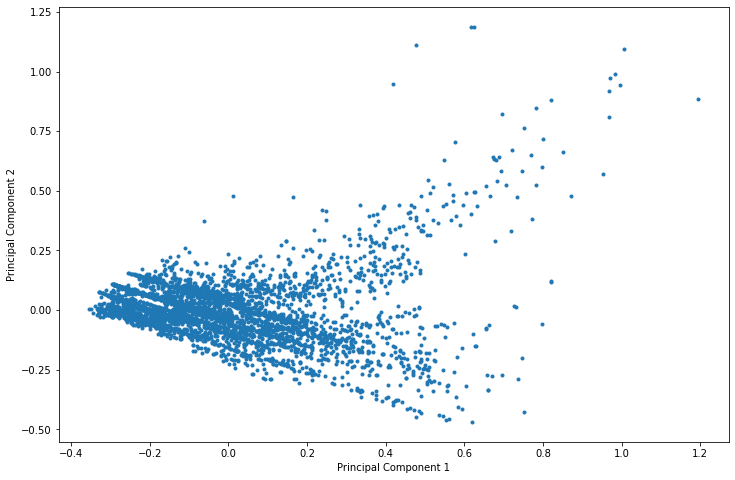

In [208]:
plt.figure(plt.figure(figsize=(12, 8)))
plt.scatter(pca_df['PC1'], pca_df['PC2'], marker='.')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Classification

In [209]:
df_known = data[data['category'] != 'Unknown']

In [210]:
df_known

,cpuName,PC1,PC2,testDate,socket,category
0,AMD Ryzen Threadripper PRO 5995WX,1.194550,0.883438,2022,sWRX8,Desktop
1,AMD EPYC 7763,0.997059,0.945239,2021,SP3,Server
2,AMD EPYC 7J13,1.006035,1.093335,2021,unknown,Server
3,AMD EPYC 7713,0.968630,0.811068,2021,SP3,Server
4,AMD Ryzen Threadripper PRO 3995WX,0.968986,0.919809,2020,sWRX8,Desktop
...,...,...,...,...,...,...
3820,Intel Pentium 4 1.60GHz,-0.299115,0.049335,2009,PGA478,Desktop
3821,Intel Pentium 4 1400MHz,-0.292472,0.083161,2009,PGA423,Desktop
3822,Intel Pentium 4 1500MHz,-0.281536,0.084342,2009,PGA423,Desktop
3823,VIA Eden 1000MHz,-0.353390,0.002474,2017,NanoBGA2,Laptop


In [211]:
df_unknown = data[data['category'] == 'Unknown']

In [212]:
df_unknown

,cpuName,PC1,PC2,testDate,socket,category
68,ARM Neoverse-N1 80 Core 3000 MHz,0.623381,1.187479,2021,unknown,Unknown
69,ARM Neoverse-N1 80 Core 0 MHz,0.617943,1.188051,2021,unknown,Unknown
128,ARM Neoverse-N1 64 Core 0 MHz,0.419631,0.948932,2021,unknown,Unknown
318,Hygon C86 7255 16-core,0.157967,0.203024,2021,unknown,Unknown
319,ARM Neoverse-N1 80 Core 2600 MHz,0.475991,1.110793,2022,unknown,Unknown
...,...,...,...,...,...,...
3807,VIA C7-M 1200MHz,-0.325770,0.074451,2011,unknown,Unknown
3810,Intel Celeron 1.70GHz,-0.305751,0.062433,2009,unknown,Unknown
3811,VIA Nehemiah,-0.329556,0.076612,2011,unknown,Unknown
3815,VIA Esther 1000MHz,-0.328140,0.075717,2011,unknown,Unknown


In [213]:
df_known

,cpuName,PC1,PC2,testDate,socket,category
0,AMD Ryzen Threadripper PRO 5995WX,1.194550,0.883438,2022,sWRX8,Desktop
1,AMD EPYC 7763,0.997059,0.945239,2021,SP3,Server
2,AMD EPYC 7J13,1.006035,1.093335,2021,unknown,Server
3,AMD EPYC 7713,0.968630,0.811068,2021,SP3,Server
4,AMD Ryzen Threadripper PRO 3995WX,0.968986,0.919809,2020,sWRX8,Desktop
...,...,...,...,...,...,...
3820,Intel Pentium 4 1.60GHz,-0.299115,0.049335,2009,PGA478,Desktop
3821,Intel Pentium 4 1400MHz,-0.292472,0.083161,2009,PGA423,Desktop
3822,Intel Pentium 4 1500MHz,-0.281536,0.084342,2009,PGA423,Desktop
3823,VIA Eden 1000MHz,-0.353390,0.002474,2017,NanoBGA2,Laptop


In [214]:
from sklearn.model_selection import train_test_split

X = df_known.iloc[:,[1,2]]
y = df_known['category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [216]:
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Accuracy:  0.6437587657784011


In [217]:
X_unknown = df_unknown.iloc[:,[1,2]]
y_unknown = clf.predict(X_unknown)

In [219]:
y_unknown = pd.DataFrame(y_unknown)

In [235]:
df_unknown.iloc[:,:5]

,cpuName,PC1,PC2,testDate,socket
68,ARM Neoverse-N1 80 Core 3000 MHz,0.623381,1.187479,2021,unknown
69,ARM Neoverse-N1 80 Core 0 MHz,0.617943,1.188051,2021,unknown
128,ARM Neoverse-N1 64 Core 0 MHz,0.419631,0.948932,2021,unknown
318,Hygon C86 7255 16-core,0.157967,0.203024,2021,unknown
319,ARM Neoverse-N1 80 Core 2600 MHz,0.475991,1.110793,2022,unknown
...,...,...,...,...,...
3807,VIA C7-M 1200MHz,-0.325770,0.074451,2011,unknown
3810,Intel Celeron 1.70GHz,-0.305751,0.062433,2009,unknown
3811,VIA Nehemiah,-0.329556,0.076612,2011,unknown
3815,VIA Esther 1000MHz,-0.328140,0.075717,2011,unknown


In [238]:
y_unknown.columns = ['category']

In [239]:
y_unknown

,category
0,Server
1,Server
2,Server
3,Server
4,Server
...,...
255,Laptop
256,Laptop
257,Laptop
258,Laptop
